In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as prep

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
print(df.isnull().sum())

age         3
sex         3
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64


In [4]:
#Before I replace the missing values for age I need to check for very young or very old outliers
print(df["age"].hist(bins=100))

AxesSubplot(0.125,0.11;0.775x0.77)


In [5]:
#There are a lot of 18 and 19 year olds but no outliers to pull the mean in one direction too much
#Therefore I will replace the missing values in age with the mean value
df["age"].fillna(df["age"].mean(), inplace=True)
df["age"] = df["age"].astype(int)
print(df["age"].isnull().sum())

0


In [6]:
#There are now zero missing values in age

In [7]:
#Lets move on to the next column:
#Before I fill the missing values for the sex column with the most common occurance,
#I am going to check if the missing values have children so I dont fill an obvious female spot

null_data = df[df.isnull().any(axis=1)]
print(null_data)

     age     sex     bmi  children smoker     region      charges
16    52     NaN  30.780         1     no  northeast  10797.33620
66    61     NaN  39.100         2     no  southwest  14235.07200
128   32  female  17.765         2    yes  northwest          NaN
144   30    male  28.690         3    yes  northwest          NaN
162   54     NaN  39.600         1     no  southwest  10450.55200
201   48  female  32.230         1     no        NaN   8871.15170
219   24  female  23.210         0     no        NaN  25081.76784
234   39    male  24.510         2     no        NaN   6710.19190
302   56  female  37.510         2     no  southeast          NaN
429   27  female  30.400         3     no  northwest          NaN
430   19    male  33.100         0     no        NaN  23082.95533
598   43    male  32.600         2     no        NaN   7441.50100


In [8]:
#Lucky for me, all the missing values for sex have at least one children
#Therefore I can obviously fill these missing values with female
df["sex"].fillna("female", inplace=True)
print(df["sex"].isnull().sum())

0


In [9]:
#Now that there are zero missing values in sex, I will move onto region
#Lets see what the missing values for region look like
null_data = df[df.isnull().any(axis=1)]
print(null_data)

     age     sex     bmi  children smoker     region      charges
128   32  female  17.765         2    yes  northwest          NaN
144   30    male  28.690         3    yes  northwest          NaN
201   48  female  32.230         1     no        NaN   8871.15170
219   24  female  23.210         0     no        NaN  25081.76784
234   39    male  24.510         2     no        NaN   6710.19190
302   56  female  37.510         2     no  southeast          NaN
429   27  female  30.400         3     no  northwest          NaN
430   19    male  33.100         0     no        NaN  23082.95533
598   43    male  32.600         2     no        NaN   7441.50100


In [10]:
#There is no good way to estimate where these people live other to assume they live in the most common region
print(df["region"].value_counts())

southeast    362
northeast    324
northwest    324
southwest    323
Name: region, dtype: int64


In [11]:
#The most common region is southeast, therefore I will replace the missing values with the most common region
df["region"].fillna("southeast", inplace=True)
print(df["sex"].isnull().sum())

0


In [12]:
#There are four null values
print(df["charges"].isnull().sum())

4


AxesSubplot(0.125,0.125;0.775x0.755)


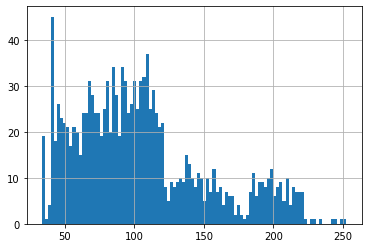

In [13]:
sqrt_transformed = df["charges"].apply(np.sqrt)
print(sqrt_transformed.hist(bins=100))

AxesSubplot(0.125,0.125;0.775x0.755)


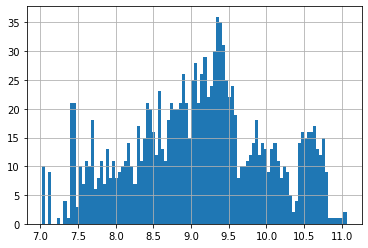

In [14]:
log_transformed = df["charges"].apply(np.log)
print(log_transformed.hist(bins=100))

In [15]:
#Out of all of those, the log of the dataset is the most normalized

0


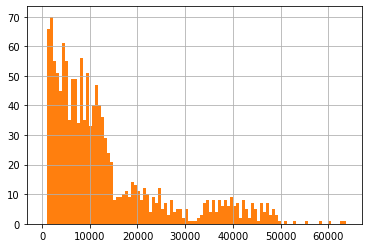

In [20]:
df["charges"] = log_transformed
df["charges"].fillna(df["charges"].median(), inplace=True)
print(df["charges"].hist(bins=100))
print(df["charges"].isnull().sum())
#Let me transform it back
df["charges"] = df["charges"].apply(np.exp)
print(df["charges"].hist(bins=100))

AxesSubplot(0.125,0.125;0.775x0.755)
0


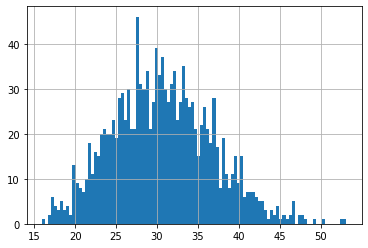

In [17]:
#Lets just see if BMI is normal already and has no null values
print(df["bmi"].hist(bins=100))
print(df["bmi"].isnull().sum())

In [18]:
df.columns = ["age","sex","bmi","children","smoker","region","log(charges)"]
print(df.isnull().sum())

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
log(charges)    0
dtype: int64


In [19]:
#Let me output the dataframe as a clean csv file now
export_csv = df.to_csv (r'C:\Users\Marty\Desktop\INFSCI 419\Assignment 4\insurance_cleaned.csv', index = None, header=True)